In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data
train_data = pd.read_csv('train.csv')
test_data  = pd.read_csv('test.csv')

# Remove rows with missing target, separate target from predictors
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data.SalePrice
train_data.drop(['SalePrice'], axis=1, inplace=True)

# Select numeric columns only 
numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]
X = train_data[numeric_cols].copy()
X_test = test_data[numeric_cols].copy()

In [3]:
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


In [4]:
my_pipeline = Pipeline(steps=[
('preprocessor', SimpleImputer()),
('model', RandomForestRegressor(n_estimators=50, random_state=0))
])

In [5]:
# Multiply by -1 since sklearn calculates negativr MAE
scores = -1 * cross_val_score(my_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')
print("Average MAE score:", scores.mean())

Average MAE score: 18311.538589041094


In [6]:
def get_sccore(n_estimators):
        my_pipeline = Pipeline(steps=[
            ('preprocessor', SimpleImputer()),
            ('model', RandomForestRegressor(n_estimators,random_state=0))])
        scores = -1 * cross_val_score(my_pipeline,X,y,cv=3,scoring='neg_mean_absolute_error')
        return scores.mean()

In [7]:
results = {}
for i in range(1,9):
    results[50*i] = get_sccore(50*i)

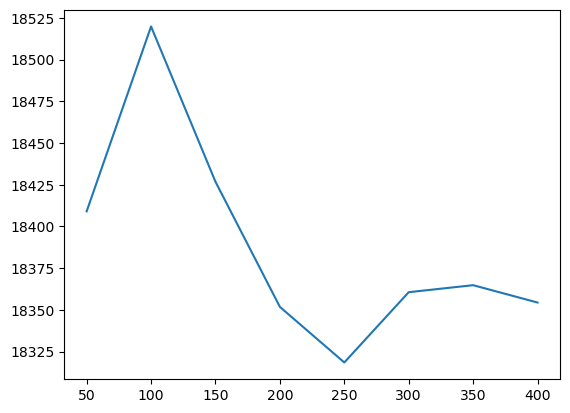

In [8]:
plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [9]:
n_estimators_best = min(results, key=results.get)